# **Step 1: Set Up the Environment**

This step involves preparing your environment by installing the necessary libraries and loading the pre-trained BERT model and tokenizer. Here’s a detailed explanation:

## **Step 1.1: Install Necessary Libraries**

**Objective:**
Ensure that you have all the necessary libraries installed for implementing the improved sentiment analysis model. This includes TensorFlow, Keras, Hugging Face Transformers, and Scikit-learn.

**Steps:**
1.    **Install Libraries:**
      *       In a new code cell, install the required libraries by running the following command:
      ```
        !pip install tensorflow keras transformers scikit-learn
      ```
      *   This command installs TensorFlow, Keras, the Transformers library from Hugging Face, and Scikit-learn. These libraries are essential for building and training your sentiment analysis model using BERT embeddings.

**Code:**
```
# Install required libraries
!pip install tensorflow keras transformers scikit-learn
```

**Explanation:**
*     **TensorFlow and Keras:** Used for building and training deep learning models.
*     **Transformers:** Provides pre-trained models and tokenizers, including BERT.
*     **Scikit-learn:** Used for data preprocessing and evaluation metrics.

**Expected Output:**
You should see a progress bar and messages indicating that the libraries are being installed. Once the installation is complete, you’ll see a message indicating successful installation.

In [ ]:
# Install required Libraries
!pip install tensorflow keras transformers scikit-learn

In [ ]:
import tensorflow as tf
import keras
import transformers
import sklearn

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)
print("Transformers version:", transformers.__version__)
print("Scikit-learn version:", sklearn.__version__)

TensorFlow version: 2.15.0
Keras version: 2.15.0
Transformers version: 4.41.2
Scikit-learn version: 1.2.2


## **1.2 Load Pre-trained BERT Model and Tokenizer**

**Objective:**
Load the pre-trained BERT model and tokenizer from the Hugging Face library. The tokenizer will be used to preprocess the text data, and the model will be used to generate embeddings.

**Steps:**
1.    **Import Libraries:**
      *   In a new code cell, import the necessary modules from the Transformers library.
      ```
        from transformers import BertTokenizer, BertModel
      ```

2.    **Load Tokenizer and Model:**
      *       Load the pre-trained BERT tokenizer and model using the `from_pretrained` method. The 'bert-base-uncased' model is a commonly used version of BERT.
      ```
        # Load pre-trained BERT tokenizer and model
        tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
        bert_model = BertModel.from_pretrained('bert-base-uncased')
      ```

**Code:**
```
from transformers import BertTokenizer, BertModel

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')
```

**Explanation:**
*     **BertTokenizer:** The tokenizer is responsible for converting text into a format that can be processed by the BERT model. It tokenizes the input text, adds special tokens, and creates attention masks.
*     **BertModel:** The model generates embeddings for the input text. These embeddings capture the semantic and contextual information of the text.

**Expected Output:**
You should see a message indicating that the tokenizer and model are being downloaded. Once the download is complete, the tokenizer and model will be ready for use.

In [ ]:
from transformers import BertTokenizer, BertModel

# Load Pre-trained BERT Model and Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
sample_text = "This is a test sentence."
tokens = tokenizer.tokenize(sample_text)
print("Tokens:", tokens)

print("BERT Model Configuration:", bert_model.config)

Tokens: ['this', 'is', 'a', 'test', 'sentence', '.']
BERT Model Configuration: BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.41.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}





---



# **Step 2: Data Preparation**

In this step, we will preprocess the text data to make it suitable for BERT and load the IMDb dataset for training and evaluation. Here’s a detailed step-by-step guide:


## **Step 2.1: Preprocess the Text Data**

**Objective:**
Convert the text data into the format required by BERT, which involves tokenization, padding, and creating attention masks.

**Steps:**
1.    **Define the Preprocessing Function:**
      *   Create a function to preprocess the text data using the BERT tokenizer. This function will handle tokenization, padding, and truncation.
      *   **Tokenization:** Convert text into tokens that the BERT model can understand.
      *   **Padding:** Ensure all sequences are of the same length by adding padding tokens.
      *   **Attention Masks:** Create masks to indicate which tokens are actual text and which are padding.

**Code:**
```
def preprocess_text(text_list):
    inputs = tokenizer(text_list, return_tensors='pt', padding=True, truncation=True, max_length=512)
    return inputs['input_ids'], inputs['attention_mask']

# Example usage
texts = ["I loved this movie!", "This film was terrible."]
input_ids, attention_masks = preprocess_text(texts)

print("Input IDs:", input_ids)
print("Attention Masks:", attention_masks)
```

**Explanation:**
*   **Tokenizer:** The tokenizer converts each review into tokens and adds special tokens required by BERT.
*   **Padding and Truncation:** Each sequence is padded to a maximum length of 512 tokens, and longer sequences are truncated
*   **Attention Masks:** Attention masks are created to differentiate between actual tokens and padding tokens.

**Expected Output:**
You should see the tokenized input IDs and attention masks for the example texts.

In [ ]:
def preprocess_text(text_list):
    inputs = tokenizer(text_list, return_tensors='pt', padding=True, truncation=True, max_length=512)
    return inputs['input_ids'], inputs['attention_mask']

# Example usage
texts = ["I loved this movie!", "This film was terrible."]
input_ids, attention_masks = preprocess_text(texts)

print("Input IDs:", input_ids)
print("Attention Masks:", attention_masks)

Input IDs: tensor([[ 101, 1045, 3866, 2023, 3185,  999,  102],
        [ 101, 2023, 2143, 2001, 6659, 1012,  102]])
Attention Masks: tensor([[1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1]])


## **Step 2.2: Preprocess and Prepare the IMDb Dataset**

**Objective:**
Load the IMDb dataset, preprocess the reviews, and prepare them for model training.

**Steps:**
1.    **Load the IMDb Dataset:**
      *   Use a function to read the IMDb reviews from the dataset directory. This function will traverse the directory and read the text files.

**Code:**
```
import os
import pandas as pd

def read_imdb_data(directory):
    reviews = []
    for subdir, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".txt"):
                with open(os.path.join(subdir, file), 'r', encoding='utf-8') as f:
                    reviews.append(f.read())
    return reviews

# Assuming you have the 'aclImdb' directory uploaded in your Colab environment
train_pos_reviews = read_imdb_data('aclImdb/train/pos')
train_neg_reviews = read_imdb_data('aclImdb/train/neg')
train_reviews = train_pos_reviews + train_neg_reviews

print(f"Number of positive reviews: {len(train_pos_reviews)}")
print(f"Number of negative reviews: {len(train_neg_reviews)}")
```

**Explanation:**
*   **Directory Traversal:** The function traverses the specified directory and reads all text files.
*   **Reviews:** The reviews are stored in a list, which can then be used for further processing.

**Expected Output:**
You should see the number of positive and negative reviews loaded from the dataset.

2.    **Preprocess the IMDb Reviews:**
      *   Use the `preprocess_text` function to tokenize and create attention masks for the IMDb reviews.

**Code:**
```
# Tokenize the reviews
input_ids, attention_masks = preprocess_text(train_reviews)

print("Tokenized Input IDs:", input_ids.shape)
print("Attention Masks:", attention_masks.shape)
```

**Explanation:**
*   **Tokenization:** Convert the reviews into token IDs and attention masks using the BERT tokenizer.

**Expected Output:**
You should see the shapes of the tokenized input IDs and attention masks, indicating the data has been preprocessed correctly.

In [ ]:
# Download the IMDb Dataset
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

--2024-07-14 03:41:57--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  14.6MB/s    in 13s     

2024-07-14 03:42:11 (5.97 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [ ]:
# Unzip the Downloaded File
!tar -xvzf aclImdb_v1.tar.gz

Streaming output truncated to the last 5000 lines.
aclImdb/train/unsup/44983_0.txt
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train/unsup/4

In [ ]:
import os
import pandas as pd

def read_imdb_data(directory):
    reviews = []
    for subdir, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".txt"):
                with open(os.path.join(subdir, file), 'r', encoding='utf-8') as f:
                    reviews.append(f.read())
    return reviews

# Assuming the 'aclImdb' directory have been downloaded in the Colab environment
train_pos_reviews = read_imdb_data('aclImdb/train/pos')
train_neg_reviews = read_imdb_data('aclImdb/train/neg')
train_reviews = train_pos_reviews + train_neg_reviews

print(f"Number of positive reviews: {len(train_pos_reviews)}")
print(f"Number of negative reviews: {len(train_neg_reviews)}")

Number of positive reviews: 12500
Number of negative reviews: 12500


In [ ]:
# Tokenize the reviews
input_ids, attention_masks = preprocess_text(train_reviews)

print("Tokenized Input IDs:", input_ids.shape)
print("Attention Masks:", attention_masks.shape)

Tokenized Input IDs: torch.Size([25000, 512])
Attention Masks: torch.Size([25000, 512])




---



# **Step 3: Building the Improved Model**

In this step, we will generate BERT embeddings for the preprocessed reviews and define the improved model architecture using these embeddings. Here’s a detailed step-by-step guide:

## **Step 3.1: Generate BERT Embeddings in Batches Using GPU**

**Objective:**
Pass the preprocessed data through the BERT model in smaller batches to obtain embeddings, using GPU to speed up the process.

**Steps:**
1.    **Import Necessary Libraries and Check GPU Availability:**
      *   Ensure you have PyTorch installed and import the necessary modules.
      *   Check if a GPU is available

**Code:**
```
import torch

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')
```

2.    **Define the Function to Generate BERT Embeddings:**
      *   Create a function `get_bert_embeddings_in_batches` that takes a list of reviews, preprocesses them in batches with a fixed maximum length, and generates BERT embeddings using the GPU.

**Code:**
```
def preprocess_text_in_batches(text_list, batch_size=32, max_length=512):
    for i in range(0, len(text_list), batch_size):
        batch = text_list[i:i + batch_size]
        inputs = tokenizer(batch, return_tensors='pt', padding=True, truncation=True, max_length=max_length)
        inputs = {key: value.to(device) for key, value in inputs.items()}
        yield inputs['input_ids'], inputs['attention_mask']

def get_bert_embeddings_in_batches(reviews, batch_size=32, max_length=512):
    all_embeddings = []
    for input_ids, attention_masks in preprocess_text_in_batches(reviews, batch_size, max_length):
        with torch.no_grad():
            outputs = bert_model(input_ids, attention_mask=attention_masks)
        embeddings = outputs.last_hidden_state[:, 0, :]  # Use CLS token embedding
        all_embeddings.append(embeddings.cpu())  # Move embeddings to CPU to save GPU memory
    return torch.cat(all_embeddings, dim=0)

# Move model to GPU
bert_model.to(device)

# Example usage with batch size of 32 and max length of 512
embeddings = get_bert_embeddings_in_batches(train_reviews, batch_size=32, max_length=512)

print("Embeddings shape:", embeddings.shape)
```

**Explanation:**
*   **Batch Processing with Fixed Length:** The `preprocess_text_in_batches` function processes the reviews in smaller batches with a fixed maximum length (e.g., 512). This ensures all sequences in a batch are padded to the same length.
*   **CLS Token Embeddings:** The embeddings are taken from the CLS token's position, which is standard practice for sentence-level tasks.
*   **GPU Utilization:** The tensors and the BERT model are moved to the GPU for faster processing.
*   **Concatenation:** The embeddings for each batch are concatenated together to form the complete set of embeddings.

**Expected Output:**
You should see the shape of the generated embeddings, indicating that the embeddings have been successfully generated for the dataset without running out of memory.

In [ ]:
import torch

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

Using device: cuda


In [ ]:
def preprocess_text_in_batches(text_list, batch_size=32, max_length=512):
    for i in range(0, len(text_list), batch_size):
        batch = text_list[i:i + batch_size]
        inputs = tokenizer(batch, return_tensors='pt', padding=True, truncation=True, max_length=max_length)
        inputs = {key: value.to(device) for key, value in inputs.items()}
        yield inputs['input_ids'], inputs['attention_mask']

def get_bert_embeddings_in_batches(reviews, batch_size=32, max_length=512):
    all_embeddings = []
    for input_ids, attention_masks in preprocess_text_in_batches(reviews, batch_size, max_length):
        with torch.no_grad():
            outputs = bert_model(input_ids, attention_mask=attention_masks)
        embeddings = outputs.last_hidden_state[:, 0, :]  # Use CLS token embedding
        all_embeddings.append(embeddings.cpu())  # Move embeddings to CPU to save GPU memory
    return torch.cat(all_embeddings, dim=0)

# Move model to GPU
bert_model.to(device)

# Example usage with batch size of 32 and max length of 512
embeddings = get_bert_embeddings_in_batches(train_reviews, batch_size=32, max_length=512)

print("Embeddings shape:", embeddings.shape)

Embeddings shape: torch.Size([25000, 768])


In [ ]:
for input_ids, attention_masks in preprocess_text_in_batches(train_reviews, batch_size=32):
    print("Input IDs batch shape:", input_ids.shape)
    print("Attention mask batch shape:", attention_masks.shape)
    break  # Check the first batch

Input IDs batch shape: torch.Size([32, 512])
Attention mask batch shape: torch.Size([32, 512])


## **3.2: Define the Improved Model Architecture**

**Objective:**
Implement the improved model using BERT embeddings and additional layers like Bidirectional GRUs.

**Steps:**
1.    **Import Necessary Libraries:**
      *   Ensure you have PyTorch and its neural network module imported.

**Code:**
```
import torch.nn as nn
```

2.    **Define the BERTSentiment Class:**
      *   Create a class `BERTSentimentClassifier` that inherits from `nn.Module`. This class will define the model architecture.

**Code:**
```
class BERTSentimentClassifier(nn.Module):
    def __init__(self, bert_model):
        super(BERTSentimentClassifier, self).__init__()
        self.bert = bert_model
        self.gru = nn.GRU(bert_model.config.hidden_size, 128, bidirectional=True, batch_first=True)
        self.dropout = nn.Dropout(0.5)
        self.classifier = nn.Linear(128 * 2, 1)  # Binary classification

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids, attention_mask=attention_mask)
        cls_output = outputs.last_hidden_state[:, 0, :]  # CLS token output
        gru_output, _ = self.gru(cls_output.unsqueeze(1))
        gru_output = self.dropout(gru_output[:, -1, :])
        logits = self.classifier(gru_output)
        return logits
```

**Explanation:**
*   **BERT Model:** The pre-trained BERT model is used to generate embeddings.
*   **GRU Layer:** A Bidirectional GRU layer is added to process the embeddings. The hidden size is set to 128, and `batch_first=True` ensures the batch dimension is first.
*   **Dropout Layer:** A dropout layer is added to prevent overfitting.
*   **Classifier Layer:** A linear layer is added for binary classification (positive/negative sentiment).

3.    **Instantiate the Model:**
      *   Create an instance of the `BERTSentimentClassifier` class.

**Code:**
```
# Instantiate the model and move it to GPU
model = BERTSentimentClassifier(bert_model).to(device)
print(model)
```

**Expected Output:**
You should see a summary of the model architecture, indicating that the model has been successfully instantiated and moved to the GPU.

In [ ]:
import torch.nn as nn

In [ ]:
class BERTSentimentClassifier(nn.Module):
    def __init__(self, bert_model):
        super(BERTSentimentClassifier, self).__init__()
        self.bert = bert_model
        self.gru = nn.GRU(bert_model.config.hidden_size, 128, bidirectional=True, batch_first=True)
        self.dropout = nn.Dropout(0.5)
        self.classifier = nn.Linear(128 * 2, 1)  # Binary classification

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids, attention_mask=attention_mask)
        cls_output = outputs.last_hidden_state[:, 0, :]  # CLS token output
        gru_output, _ = self.gru(cls_output.unsqueeze(1))
        gru_output = self.dropout(gru_output[:, -1, :])
        logits = self.classifier(gru_output)
        return logits

In [ ]:
# Instantiate the model and move it to GPU
model = BERTSentimentClassifier(bert_model).to(device)
print(model)

BERTSentimentClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, e



---



# **Step 4: Training the Improved Model**

In this step, we will prepare the dataset and dataloader, and then train the improved model using the GPU.

## **Step 4.1: Prepare the Dataset and Dataloader**

**Objective:**
Convert the data into tensors and create a DataLoader for batch processing.

**Steps:**
1.    **Convert Labels to Tensors:**
      *   Convert the labels to PyTorch tensors.

**Code:**
```
# Convert labels to tensors
labels = [1] * len(train_pos_reviews) + [0] * len(train_neg_reviews)
labels = torch.tensor(labels).to(device)
```

2.    **Preprocess Text to Get Input IDs and Attention Masks:**
      *   Ensure the text is preprocessed and padded to the same length.

**Code:**
```
def preprocess_text_in_batches(text_list, batch_size=32, max_length=512):
    input_ids_list = []
    attention_masks_list = []
    for i in range(0, len(text_list), batch_size):
        batch = text_list[i:i + batch_size]
        inputs = tokenizer(batch, return_tensors='pt', padding='max_length', truncation=True, max_length=max_length)
        input_ids_list.append(inputs['input_ids'])
        attention_masks_list.append(inputs['attention_mask'])
    return torch.cat(input_ids_list), torch.cat(attention_masks_list)

input_ids, attention_masks = preprocess_text_in_batches(train_reviews, batch_size=32, max_length=512)

print("Input IDs shape:", input_ids.shape)
print("Attention Masks shape:", attention_masks.shape)
print("Labels shape:", labels.shape)
```

3.    **Prepare Dataset and DataLoader:**
      *           Use the `TensorDataset` and `DataLoader` classes from PyTorch to create a dataset and dataloader.

**Code:**
```
from torch.utils.data import DataLoader, TensorDataset
from transformers import AdamW

# Prepare the dataset
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create the dataloader
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
```

**Explanation:**
*   **TensorDataset:** Combines the input IDs, attention masks, and labels into a single dataset object.
*   **DataLoader:** Creates an iterable for the dataset, allowing for efficient batch processing during training.

**Expected Output:**
No specific output is expected here, but ensure there are no errors during the creation of the dataset and DataLoader.

In [ ]:
# Convert labels to tensors
labels = [1] * len(train_pos_reviews) + [0] * len(train_neg_reviews)
labels = torch.tensor(labels).to(device)

In [ ]:
def preprocess_text_in_batches(text_list, batch_size=32, max_length=512):
    input_ids_list = []
    attention_masks_list = []
    for i in range(0, len(text_list), batch_size):
        batch = text_list[i:i + batch_size]
        inputs = tokenizer(batch, return_tensors='pt', padding='max_length', truncation=True, max_length=max_length)
        input_ids_list.append(inputs['input_ids'])
        attention_masks_list.append(inputs['attention_mask'])
    return torch.cat(input_ids_list), torch.cat(attention_masks_list)

input_ids, attention_masks = preprocess_text_in_batches(train_reviews, batch_size=32, max_length=512)

print("Input IDs shape:", input_ids.shape)
print("Attention Masks shape:", attention_masks.shape)
print("Labels shape:", labels.shape)

Input IDs shape: torch.Size([25000, 512])
Attention Masks shape: torch.Size([25000, 512])
Labels shape: torch.Size([25000])


In [ ]:
from torch.utils.data import DataLoader, TensorDataset
from transformers import AdamW

# Prepare the dataset
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create the dataloader
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

## **Step 4.2: Training Loop**

**Objective:**
Train the improved model using the training data.

**Steps:**
1.    **Define Optimizer and Loss Function:**
      *   Use the `AdamW` optimizer and `BCEWithLogitsLoss` loss function.

**Code:**
```
# Define optimizer and loss function
optimizer = AdamW(model.parameters(), lr=2e-5)
criterion = nn.BCEWithLogitsLoss()
```

2.    **Training Loop:**
      *   Train the model for a specified number of epochs.

**Code:**
```
# Move model to training mode
model.train()

# Training loop
for epoch in range(10):  # Example: 10 epochs
    total_loss = 0
    for batch in dataloader:
        input_ids, attention_mask, labels = batch
        # Move data to GPU
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs.squeeze(-1), labels.float())
        total_loss += loss.item()

        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
    print(f'Epoch {epoch + 1} completed with average loss: {total_loss / len(dataloader)}')
```

**Explanation:**
*   **Move Data to GPU:** Ensure the input data and labels are moved to the GPU before the forward pass.
*   **Zero Gradients:** Reset the gradients to zero at the start of each batch.
*   **Forward Pass:** Pass the input data through the model to get the outputs.
*   **Compute Loss:** Calculate the loss using the `BCEWithLogitsLoss` function.
*   **Backward Pass:** Perform backpropagation to compute the gradients.
*   **Optimization:** Update the model parameters using the `AdamW` optimizer.

**Expected Output:**
You should see the average loss value for each epoch printed, indicating the progress of the training.

In [ ]:
# Define optimizer and loss function
optimizer = AdamW(model.parameters(), lr=2e-5)
criterion = nn.BCEWithLogitsLoss()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:588: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
# Move model to training mode
model.train()

# Training loop
for epoch in range(10):  # Example: 10 epochs
    total_loss = 0
    for batch in dataloader:
        input_ids, attention_mask, labels = batch
        # Move data to GPU
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs.squeeze(-1), labels.float())
        total_loss += loss.item()

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch + 1} completed with average loss: {total_loss / len(dataloader)}')

Epoch 1 completed with average loss: 0.25272345445964417
Epoch 2 completed with average loss: 0.13226196194982245
Epoch 3 completed with average loss: 0.07361119569581755
Epoch 4 completed with average loss: 0.046884061882088955
Epoch 5 completed with average loss: 0.03752110355540805
Epoch 6 completed with average loss: 0.028968076853443634
Epoch 7 completed with average loss: 0.02421895019523085
Epoch 8 completed with average loss: 0.02479749970192261
Epoch 9 completed with average loss: 0.02044086971039148
Epoch 10 completed with average loss: 0.02102382384273974




---



# **Step 5: Evaluation**

Use the test dataset to evaluate the improved model and compare its performance with the baseline model.

**Objective:**
Use the test dataset to evaluate the improved model and compare its performance with the baseline model.

**Steps:**
1.    **Preprocess the Test Data:**
      *   Read and preprocess the test data similarly to how you processed the training data.

**Code:**
```
# Read the test data
test_pos_reviews = read_imdb_data('aclImdb/test/pos')
test_neg_reviews = read_imdb_data('aclImdb/test/neg')
test_reviews = test_pos_reviews + test_neg_reviews

# Convert labels to tensors
test_labels = [1] * len(test_pos_reviews) + [0] * len(test_neg_reviews)
test_labels = torch.tensor(test_labels).to(device)

# Preprocess the test data
test_input_ids, test_attention_masks = preprocess_text_in_batches(test_reviews, batch_size=32, max_length=512)

print("Test Input IDs shape:", test_input_ids.shape)
print("Test Attention Masks shape:", test_attention_masks.shape)
print("Test Labels shape:", test_labels.shape)
```

2.    **Evaluate the Model:**
      *   Use the test dataset to evaluate the improved model and calculate evaluation metrics.

**Code:**
```
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Ensure the model is in evaluation mode
model.eval()

# Initialize a list to store predictions
test_preds = []

# Iterate over the test data in batches
with torch.no_grad():
    for i in range(0, len(test_reviews), 32):
        input_ids_batch = test_input_ids[i:i + 32].to(device)
        attention_masks_batch = test_attention_masks[i:i + 32].to(device)
        
        # Forward pass
        outputs = model(input_ids_batch, attention_mask=attention_masks_batch)
        preds = torch.round(torch.sigmoid(outputs.squeeze(-1)))
        
        # Move predictions to CPU and store them
        test_preds.extend(preds.cpu().numpy())

# Convert test predictions to a tensor
test_preds = torch.tensor(test_preds).to(device)

# Calculate evaluation metrics
improved_accuracy = accuracy_score(test_labels.cpu(), test_preds.cpu())
improved_precision = precision_score(test_labels.cpu(), test_preds.cpu())
improved_recall = recall_score(test_labels.cpu(), test_preds.cpu())
improved_f1 = f1_score(test_labels.cpu(), test_preds.cpu())

print(f'Improved Accuracy: {improved_accuracy}')
print(f'Improved Precision: {improved_precision}')
print(f'Improved Recall: {improved_recall}')
print(f'Improved F1 Score: {improved_f1}')
```

**Explanation:**
*   **Preprocess the Test Data:** Read and preprocess the test reviews, and convert the labels to tensors.
*   **Move Data to GPU:** Ensure the test data is moved to the GPU.
*   **Evaluation Loop:** Iterate over the test data in batches, perform a forward pass through the model, and collect the predictions.
*   **Calculate Metrics:** Use the collected predictions to calculate accuracy, precision, recall, and F1-score.

**Expected Output:**
You should see the improved model's evaluation metrics, such as accuracy, precision, recall, and F1-score, printed out. These metrics will help you compare the improved model's performance with the baseline model.

In [ ]:
# Read the test data
test_pos_reviews = read_imdb_data('aclImdb/test/pos')
test_neg_reviews = read_imdb_data('aclImdb/test/neg')
test_reviews = test_pos_reviews + test_neg_reviews

# Convert labels to tensors
test_labels = [1] * len(test_pos_reviews) + [0] * len(test_neg_reviews)
test_labels = torch.tensor(test_labels).to(device)

# Preprocess the test data
test_input_ids, test_attention_masks = preprocess_text_in_batches(test_reviews, batch_size=32, max_length=512)

print("Test Input IDs shape:", test_input_ids.shape)
print("Test Attention Masks shape:", test_attention_masks.shape)
print("Test Labels shape:", test_labels.shape)

Test Input IDs shape: torch.Size([25000, 512])
Test Attention Masks shape: torch.Size([25000, 512])
Test Labels shape: torch.Size([25000])


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Ensure the model is in evaluation mode
model.eval()

# Initialize a list to store predictions
test_preds = []

# Iterate over the test data in batches
with torch.no_grad():
    for i in range(0, len(test_reviews), 32):
        input_ids_batch = test_input_ids[i:i + 32].to(device)
        attention_masks_batch = test_attention_masks[i:i + 32].to(device)

        # Forward pass
        outputs = model(input_ids_batch, attention_mask=attention_masks_batch)
        preds = torch.round(torch.sigmoid(outputs.squeeze(-1)))

        # Move predictions to CPU and store them
        test_preds.extend(preds.cpu().numpy())

# Convert test predictions to a tensor
test_preds = torch.tensor(test_preds).to(device)

# Calculate evaluation metrics
improved_accuracy = accuracy_score(test_labels.cpu(), test_preds.cpu())
improved_precision = precision_score(test_labels.cpu(), test_preds.cpu())
improved_recall = recall_score(test_labels.cpu(), test_preds.cpu())
improved_f1 = f1_score(test_labels.cpu(), test_preds.cpu())

print(f'Improved Accuracy: {improved_accuracy}')
print(f'Improved Precision: {improved_precision}')
print(f'Improved Recall: {improved_recall}')
print(f'Improved F1 Score: {improved_f1}')

Improved Accuracy: 0.93576
Improved Precision: 0.9375803341902313
Improved Recall: 0.93368
Improved F1 Score: 0.9356261022927689


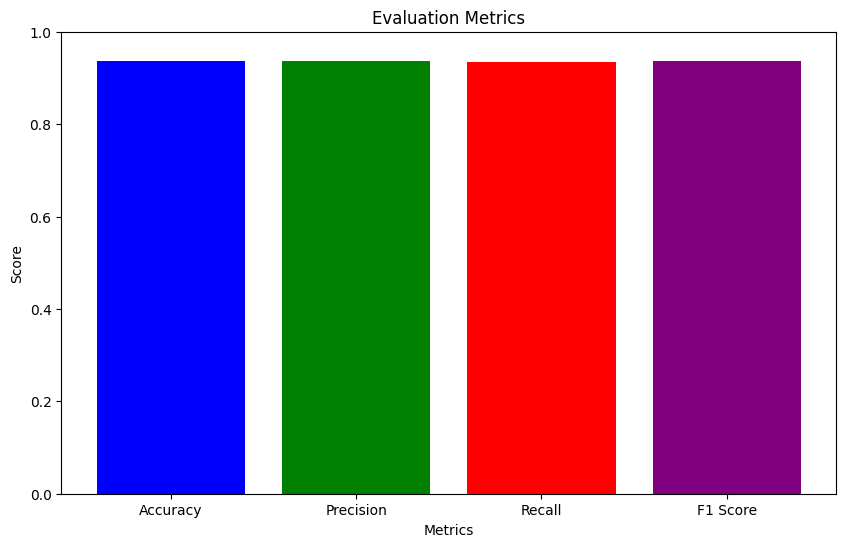

In [1]:
# Plotting Evaluation Metrics

import matplotlib.pyplot as plt

accuracy = 0.9358
precision = 0.9376
recall = 0.9337
f1 = 0.9356

metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

plt.figure(figsize=(10, 6))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Evaluation Metrics')
plt.ylim(0, 1)
plt.savefig('evaluation_metrics.png')
plt.show()